<a href="https://colab.research.google.com/github/arushi-lu/deep_learning/blob/main/BP_LSTM_hdf5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

file_id = '1IxN2sX2TX0uK6CFDh8eudb8haz3RlF7X'
download_url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'data.hdf5'

gdown.download(download_url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1IxN2sX2TX0uK6CFDh8eudb8haz3RlF7X
From (redirected): https://drive.google.com/uc?id=1IxN2sX2TX0uK6CFDh8eudb8haz3RlF7X&confirm=t&uuid=47ea51b8-6342-42e5-9609-fa7d797769b1
To: /content/data.hdf5
100%|██████████| 2.55G/2.55G [00:40<00:00, 62.6MB/s]


'data.hdf5'

In [2]:
import h5py

# Load the HDF5 file
file_path = 'data.hdf5'
with h5py.File(file_path, 'r') as f:
    # List all groups and datasets within the file
    print("Keys in 'data.hdf5':")
    print(list(f.keys()))

    # Assuming there's a dataset named 'data' containing all samples
    dataset = f['data']

    # Check the shape of the dataset to understand its size
    print("Shape of 'data' dataset:", dataset.shape)

Keys in 'data.hdf5':
['data']
Shape of 'data' dataset: (127260, 2, 1250)


In [3]:
with h5py.File(file_path, 'r') as f:
    dataset = f['data']
    M = f['data'][:]
    print(dataset.shape)
    print(dataset.dtype)
    print(dataset.name)

    num_samples_to_print = 5
    for i in range(num_samples_to_print):
        sample_data = dataset[i]  # Assuming dataset is a numpy array
        print(f"Sample {i+1}: {sample_data}")
        print(f"Sample {i+1} shape: {sample_data.shape}")



(127260, 2, 1250)
float64
/data
Sample 1: [[66.31056163 65.99796028 65.68535892 ... 60.5665118  61.1917145
  63.30177362]
 [ 1.22385142  1.21798631  1.21603128 ...  1.27272727  1.27956989
   1.28347996]]
Sample 1 shape: (2, 1250)
Sample 2: [[ 79.17629303  78.54131967  78.10172273 ...  85.81909121  92.6572658
  100.47232249]
 [  2.31476051   2.28152493   2.2512219  ...   1.71065494   1.69599218
    1.67839687]]
Sample 2 shape: (2, 1250)
Sample 3: [[ 67.69792852  78.44363146  90.41043701 ... 110.68074028 110.19229924
  109.60616999]
 [  0.91788856   0.91495601   0.91397849 ...   1.38709677   1.38416422
    1.38123167]]
Sample 3 shape: (2, 1250)
Sample 4: [[ 72.60166382  72.13276179  71.66385977 ... 108.98064607 107.06596279
  105.07312918]
 [  2.29325513   2.22091887   2.14760508 ...   0.96969697   0.96383187
    0.95698925]]
Sample 4 shape: (2, 1250)
Sample 5: [[89.29598156 88.94396061 88.47459934 ... 90.11736379 89.5306622
  89.06130093]
 [ 0.63538612  0.61192571  0.58651026 ...  0.577

In [4]:
M.shape

(127260, 2, 1250)

In [5]:
M[0].shape

(2, 1250)

In [6]:
M[0][0]

array([66.31056163, 65.99796028, 65.68535892, ..., 60.5665118 ,
       61.1917145 , 63.30177362])

In [7]:
M[0][0].shape

(1250,)

In [8]:
M[127259].shape

(2, 1250)

In [9]:
ex_ppg = M[0][1][0:400]
ex_abp = M[0][0][0:400]

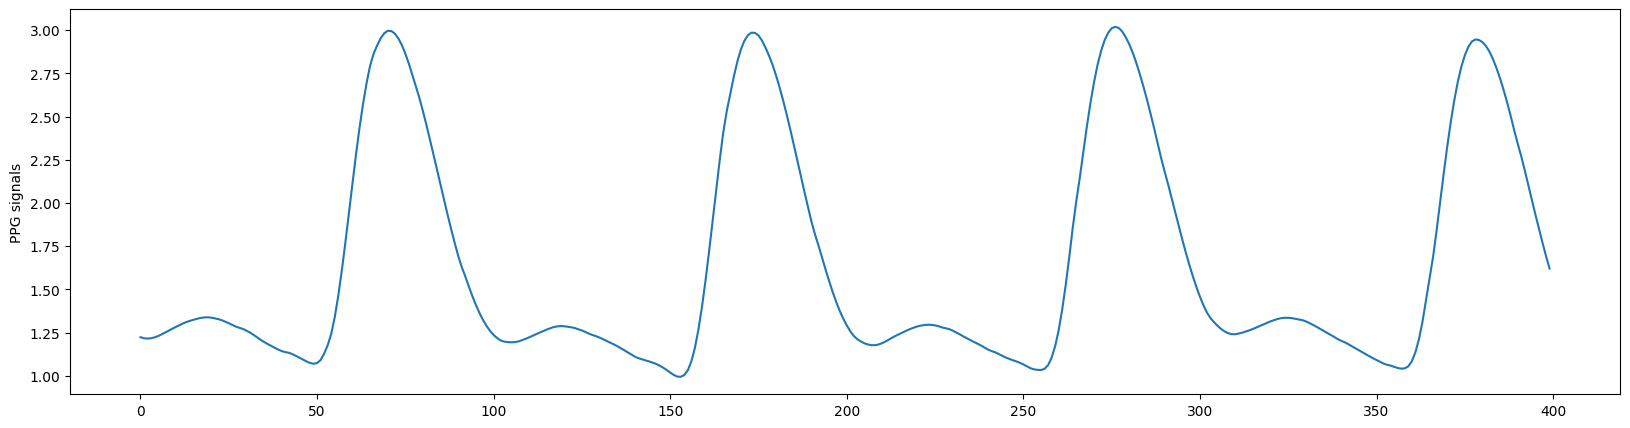

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(ex_ppg)
plt.ylabel('PPG signals')
plt.show()

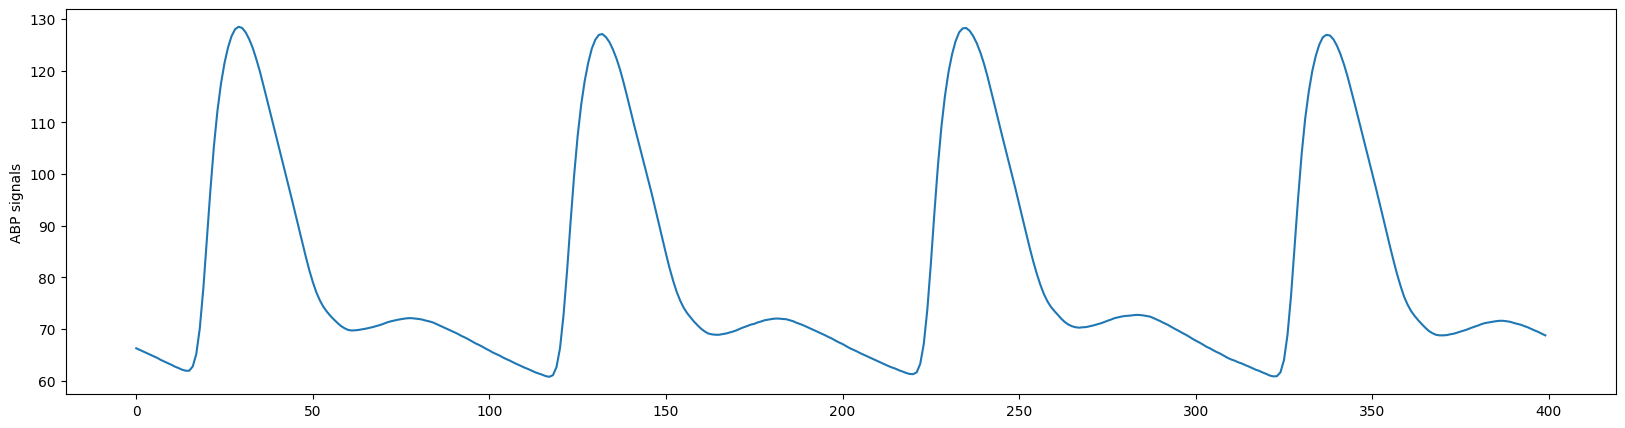

In [11]:
plt.figure(figsize=(20,5))
plt.plot(ex_abp)
plt.ylabel('ABP signals')
plt.show()

In [12]:
M = M[:1564]

In [13]:
M.shape

(1564, 2, 1250)

In [14]:
M.shape[0]

1564

In [15]:
import numpy as np
ppg = np.array([M[index][1] for index in range(M.shape[0])])
ppg.shape

(1564, 1250)

In [16]:
abp = np.array([M[index][0] for index in range(M.shape[0])])
abp.shape

(1564, 1250)

In [17]:
train_per = int(abp.shape[0] * 80 / 100)
test_per = int(abp.shape[0] * 20 / 100)
print('Num training set: ', train_per)
print('Num testing set:  ', test_per)

Num training set:  1251
Num testing set:   312


In [18]:
# sort data so, we will be able to train on the larger dataset
sort_index = np.argsort([value.shape[0] for value in abp])

ppg = np.array([ppg[index] for index in sort_index])
abp = np.array([abp[index] for index in sort_index])

In [19]:
X_main, X_test, y_main, y_test = ppg[test_per:], ppg[:test_per], abp[test_per:], abp[:test_per]

In [20]:
X_main.shape

(1252, 1250)

In [21]:
X_test.shape

(312, 1250)

In [22]:
!mkdir data
data_path = 'data/'

In [23]:
np.save(data_path+'x_main.npy', X_main)
np.save(data_path+'y_main.npy', y_main)
np.save(data_path+'x_test.npy', X_test)
np.save(data_path+'y_test.npy', y_test)

In [24]:
import numpy as np

data_path = 'data/'

def convert_to_2d(arr, index=None):
    array = []
    if index != None:
        for subject_index in range(arr.shape[0]):
            array.extend(arr[subject_index][index])
    else:
        for subject_index in range(arr.shape[0]):
            array.extend(arr[subject_index])
    return np.array(array)

def find_max_min(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    print('min: ', arr_min)
    print('max: ', arr_max)

    return arr_min, arr_max

def to_timeseries(X, y, is_train, max_len):

    #print(X)
    #print(X.shape)
    #print(X[0])
    #print(X[0].shape)
    """
    generate data for one user.
    """
    seq_x = []
    seqs_x = []
    seqs_y = []
    seq_y = []

    min_max = np.load(data_path+'min_max.npy')
    min_max_train = np.load(data_path+'min_max_train.npy')

    ppg_all_min, ppg_all_max = min_max[0]
    abp_all_min, abp_all_max = min_max[1]

    ppg_train_min, ppg_train_max = min_max_train[0]
    abp_train_min, abp_train_max = min_max_train[1]



    for i in range(len(X)):
        if len(seq_x) < max_len:
            if is_train:
                seq_x.append([
                    (X[i]-ppg_train_min)/(ppg_train_max-ppg_train_min)
                ])
                seq_y.append([(y[i]-abp_train_min)/(abp_train_max-abp_train_min)])
            else:
                seq_x.append([
                    (X[i]-ppg_all_min)/(ppg_all_max-ppg_all_min)
                ])
                seq_y.append([(y[i]-abp_all_min)/(abp_all_max-abp_all_min)])
        else:
            seq_x = seq_x[1:]
            seq_y = seq_y[1:]
            if is_train:
                seq_x.append([
                    (X[i]-ppg_train_min)/(ppg_train_max-ppg_train_min)
                ])
                seq_y.append([(y[i]-abp_train_min)/(abp_train_max-abp_train_min)])
            else:
                seq_x.append([(X[i]-ppg_all_min)/(ppg_all_max-ppg_all_min)])
                seq_y.append([(y[i]-abp_all_min)/(abp_all_max-abp_all_min)])
        if len(seq_x) < max_len:
            continue
        else:
            seqs_x.append(seq_x)
            seqs_y.append(seq_y)

    zeros_y = np.zeros((len(seqs_y), max_len, 1))
    return seqs_x, zeros_y, seqs_y

def find_abp_peak_sys(abp, delay):
    index_max_abp = []
    loop_count = int(len(abp)/delay)
    index = 0
    for i in range(loop_count):
        max_value = 0
        max_index = 0
        for j in abp[i*delay:(i+1)*delay]:
            if j > max_value:
                max_value = j
                max_index = index

            index = index + 1
        index_max_abp.append(max_index)

    return index_max_abp

def find_abp_peak_dia(abp, delay):
    index_min_abp = []
    loop_count = int(len(abp)/delay)
    index = 0
    for i in range(loop_count):
        min_value = 9999999999
        min_index = 0
        for j in abp[i*delay:(i+1)*delay]:
            if j < min_value:
                min_value = j
                min_index = index
            index = index + 1

        index_min_abp.append(min_index)

    return index_min_abp

def zero_order_holding_first(abp, delay, is_sys):
    if is_sys:
        index_max_abp = find_abp_peak_sys(abp, delay)
    else:
        index_max_abp = find_abp_peak_dia(abp, delay)

    peak_abp = np.zeros(len(abp))
    j = 0
    for i in range(len(abp)):
        if i < index_max_abp[j]:
            if j == 1:
                peak_abp[i] = abp[index_max_abp[0]]
            else:
                peak_abp[i] = abp[index_max_abp[j-1]]
        else:
            j = j + 1
            if j >= len(index_max_abp):
                j = j - 1
            if j == 1:
                peak_abp[i] = abp[index_max_abp[0]]
            else:
                peak_abp[i] = abp[index_max_abp[j-1]]

    return peak_abp

def zero_order_second(signal):
    change = 0
    num = len(signal)
    for i in range(0, num-10):
        counter = 0
        if signal[i+1] != signal[i]:
            change = 1
            for j in range(1, 12):
                if signal[i+j] == signal[i]:
                    counter = counter + 1
        if change == 1 and counter > 0:
            for j in range(0, 11):
                signal[i+j] = signal[i]
        change = 0
    return signal

In [25]:
ppg_conv = convert_to_2d(M, 1)
abp_conv = convert_to_2d(M, 0)

In [26]:
print(ppg_conv.shape)
print(abp_conv.shape)

(1955000,)
(1955000,)


In [27]:
ppg_all_min, ppg_all_max = find_max_min(ppg_conv)
abp_all_min, abp_all_max = find_max_min(abp_conv)

min:  0.0
max:  4.001955034213099
min:  50.05529136399692
max:  199.10791215103364


In [28]:
np.save(data_path+'min_max.npy', np.array([
    [ppg_all_min, ppg_all_max],
    [abp_all_min, abp_all_max]
]))

In [29]:
data_path

'data/'

In [30]:
X_main = np.load(data_path+'x_main.npy')
y_main = np.load(data_path+'y_main.npy')
X_test = np.load(data_path+'x_test.npy')
y_test = np.load(data_path+'y_test.npy')

In [31]:
min_max = np.load(data_path+'min_max.npy')
ppg_all_min, ppg_all_max = min_max[0]
abp_all_min, abp_all_max = min_max[1]

0.0 4.001955034213099
50.05529136399692 199.10791215103364


In [48]:
import tensorflow as tf
import keras
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


def create_model():

    keras.backend.clear_session()

    layers = [128, 128]  # Number of hidden neurons in each layer of the encoder and decoder

    optimiser = keras.optimizers.Adam(learning_rate=0.001)  # No decay parameter

    num_input_features = 1  # The dimensionality of the input at each time step. In this case a 1D signal.
    num_output_features = 1  # The dimensionality of the output at each time step. In this case a 1D signal.

    loss = rmse  # Root Mean Squared Error loss function

    lambda_regulariser = 0.000001  # Regularization parameter
    regulariser = None  # No regularization used in this example

    # Define the encoder input layer
    encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

    # Create LSTM cells for the encoder
    encoder_cells = []
    for hidden_neurons in layers:
        encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                                  kernel_regularizer=regulariser,
                                                  recurrent_regularizer=regulariser,
                                                  bias_regularizer=regulariser))

    # Create the encoder RNN layer
    encoder = keras.layers.RNN(encoder_cells, return_state=True)

    # Get encoder outputs and states
    encoder_outputs_and_states = encoder(encoder_inputs)

    # Keep only the states, discard the encoder outputs
    encoder_states = encoder_outputs_and_states[1:]

    # Define the decoder input layer
    decoder_inputs = keras.layers.Input(shape=(None, 1))

    # Create LSTM cells for the decoder
    decoder_cells = []
    for hidden_neurons in layers:
        decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                                  kernel_regularizer=regulariser,
                                                  recurrent_regularizer=regulariser,
                                                  bias_regularizer=regulariser))

    # Create the decoder RNN layer
    decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

    # Set the initial state of the decoder to be the output state of the encoder
    decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

    # Only select the decoder outputs (not the states)
    decoder_outputs = decoder_outputs_and_states[0]

    # Apply a dense layer with linear activation to set output to correct dimension
    decoder_dense = keras.layers.Dense(num_output_features,
                                       activation='linear',
                                       kernel_regularizer=regulariser,
                                       bias_regularizer=regulariser)

    # Final output of the model
    decoder_outputs = decoder_dense(decoder_outputs)

    # Create the Keras model
    model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

    # Compile the model with Adam optimizer and RMSE loss
    model.compile(optimizer=optimiser, loss=loss,  metrics=['mae'])

    return model


In [35]:
batch_size = 512
epochs = 10
timewindow = 32

In [36]:
print(X_main.shape)
print(y_main.shape)
print(X_test.shape)
print(y_test.shape)

(1252, 1250)
(1252, 1250)
(312, 1250)
(312, 1250)


In [37]:
ppg_train_conv = convert_to_2d(X_main)
abp_train_conv = convert_to_2d(y_main)

In [38]:
print(ppg_train_conv.shape)
print(abp_train_conv.shape)

(1565000,)
(1565000,)


In [39]:
ppg_train_min, ppg_train_max = find_max_min(ppg_train_conv)
abp_train_min, abp_train_max = find_max_min(abp_train_conv)

min:  0.0
max:  4.001955034213099
min:  50.05529136399692
max:  199.10791215103364


In [40]:
np.save(data_path+'min_max_train.npy', np.array([
    [ppg_train_min, ppg_train_max],
    [abp_train_min, abp_train_max]
]))

In [41]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from keras.callbacks import EarlyStopping
import pandas as pd

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
import random

In [43]:
from sklearn.model_selection import train_test_split
import time
import numpy as np
from keras.callbacks import EarlyStopping

# Assuming X_main, y_main, to_timeseries, create_model, batch_size, epochs are defined

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_main, y_main, test_size=0.2, random_state=42)

# Convert the training set to time series
encoder_input, decoder_output, decoder_input = [], [], []
print('Start converting training set to timeseries...')
for i in range(X_train.shape[0]):
    s_x, z_y, s_y = to_timeseries(X_train[i], y_train[i], is_train=True, max_len=timewindow)
    encoder_input.extend(s_x)
    decoder_output.extend(s_y)
    decoder_input.extend(z_y)
encoder_input, decoder_output, decoder_input = map(np.array, [encoder_input, decoder_output, decoder_input])
print('Done converting training set to timeseries...')
print('Num of sequences:', encoder_input.shape[0])
print('-' * 30)

# Convert the validation set to time series
encoder_input_valid, decoder_output_valid, decoder_input_valid = [], [], []
print('Start converting validation set to timeseries...')
for i in range(X_valid.shape[0]):
    s_x, z_y, s_y = to_timeseries(X_valid[i], y_valid[i], is_train=False, max_len=timewindow)
    encoder_input_valid.extend(s_x)
    decoder_output_valid.extend(s_y)
    decoder_input_valid.extend(z_y)
encoder_input_valid, decoder_output_valid, decoder_input_valid = map(np.array, [encoder_input_valid, decoder_output_valid, decoder_input_valid])
print('Done converting validation set to timeseries...')
print('Num of sequences:', encoder_input_valid.shape[0])
print('=' * 30)

Start converting training set to timeseries...
Done converting training set to timeseries...
Num of sequences: 1220219
------------------------------
Start converting validation set to timeseries...
Done converting validation set to timeseries...
Num of sequences: 305969


In [44]:
print(encoder_input.shape)
print(decoder_output.shape)
print(decoder_input.shape)

print(encoder_input_valid.shape)
print(decoder_output_valid.shape)
print(decoder_input_valid.shape)

(1220219, 32, 1)
(1220219, 32, 1)
(1220219, 32, 1)
(305969, 32, 1)
(305969, 32, 1)
(305969, 32, 1)


In [49]:
# Create and train the model
model = create_model()
callbacks = [EarlyStopping(monitor='val_loss', patience=7)]

start_time = time.time()
history = model.fit(
    [encoder_input, decoder_input], decoder_output,
    validation_data=([encoder_input_valid, decoder_input_valid], decoder_output_valid),
    batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1, callbacks=callbacks
)
end_time = time.time()
training_duration = end_time - start_time

hours, rem = divmod(training_duration, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Training duration: {training_duration} seconds")
print(f"Training duration: {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds")

Epoch 1/10
2384/2384 [==============================] - 312s 129ms/step - loss: 0.1427 - mae: 0.1086 - val_loss: 0.1297 - val_mae: 0.1034
Epoch 2/10
2384/2384 [==============================] - 320s 134ms/step - loss: 0.1320 - mae: 0.0985 - val_loss: 0.1263 - val_mae: 0.1011
Epoch 3/10
2384/2384 [==============================] - 319s 134ms/step - loss: 0.1280 - mae: 0.0947 - val_loss: 0.1255 - val_mae: 0.1001
Epoch 4/10
2384/2384 [==============================] - 322s 135ms/step - loss: 0.1253 - mae: 0.0923 - val_loss: 0.1231 - val_mae: 0.0978
Epoch 5/10
2384/2384 [==============================] - 317s 133ms/step - loss: 0.1231 - mae: 0.0903 - val_loss: 0.1240 - val_mae: 0.0980
Epoch 6/10
2384/2384 [==============================] - 317s 133ms/step - loss: 0.1214 - mae: 0.0887 - val_loss: 0.1234 - val_mae: 0.0973
Epoch 7/10
2384/2384 [==============================] - 308s 129ms/step - loss: 0.1197 - mae: 0.0873 - val_loss: 0.1246 - val_mae: 0.0991
Epoch 8/10
2384/2384 [============

In [50]:
!mkdir weights

In [51]:
model.save_weights('/content/weights/model-weight2.h5')

In [52]:
model = create_model()
model.load_weights('/content/weights/model-weight2.h5')

In [53]:
user_test = 0 #index of a subject
test_x, test_zeros, _ = to_timeseries(X_test[user_test], y_test[user_test], is_train=False, max_len=timewindow)
ground_truth_x, _, ground_truth_y = to_timeseries(X_test[user_test], y_test[user_test], is_train=False, max_len=timewindow)


In [54]:
len(test_x)

1219

In [55]:
y_test_predicted = model.predict([np.array(test_x), test_zeros],
                                batch_size=batch_size, verbose=1)

3/3 [==============================] - 0s 27ms/step


In [56]:
y_test_predicted.shape

(1219, 32, 1)

In [57]:
ground_truth_y[0][0]

[0.10905725895709613]

In [58]:
y_test_predicted[0][0][0]

0.13837358

In [59]:
len(ground_truth_y)

1219

In [60]:
y_test_predicted_flat = y_test_predicted.flatten()
y_test_predicted_flat.shape

(39008,)

In [61]:
ground_truth_y_flat = np.array(ground_truth_y).flatten()
ground_truth_y_flat.shape

(39008,)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming ground_truth_y is your actual test output and y_test_predicted is the predicted output
# Calculate MSE
mse = mean_squared_error(ground_truth_y_flat, y_test_predicted_flat)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(ground_truth_y_flat, y_test_predicted_flat)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R2 score
r2 = r2_score(ground_truth_y_flat, y_test_predicted_flat)
print(f"R-squared (R2 Score): {r2}")



Mean Squared Error (MSE): 0.00934623712177254
Root Mean Squared Error (RMSE): 0.09667593869093044
Mean Absolute Error (MAE): 0.07277222914337378
R-squared (R2 Score): 0.4936327710794133


In [63]:
pred_abp = []
gt_abp = []
for i in range(y_test_predicted.shape[0]):
    pred_abp.append(y_test_predicted[i][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)
    gt_abp.append(ground_truth_y[i][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)

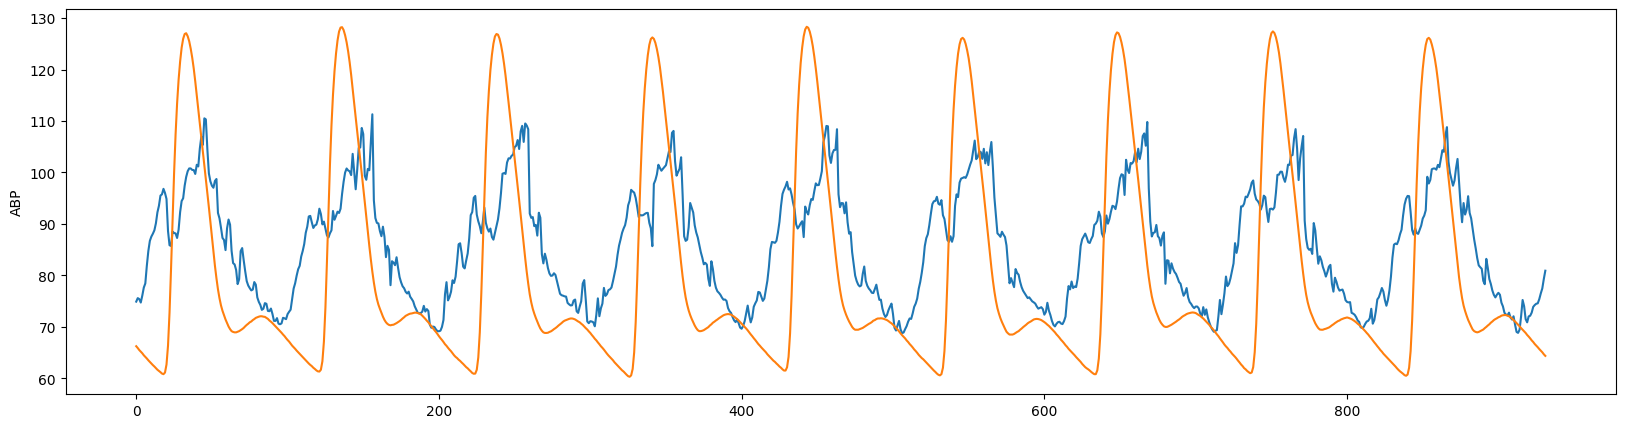

In [64]:
plt.figure(figsize=(20,5))
plt.plot(pred_abp[68:1000])
#plt.plot(pred_dia)
plt.plot(gt_abp[68:1000])
#plt.plot(gt_dia)
plt.ylabel('ABP')
plt.show()

In [65]:
pred_sys = zero_order_holding_first(pred_abp, delay=100, is_sys=True)
gt_sys = zero_order_holding_first(gt_abp, delay=100, is_sys=True)

pred_dia = zero_order_holding_first(pred_abp, delay=100, is_sys=False)
gt_dia = zero_order_holding_first(gt_abp, delay=100, is_sys=False)

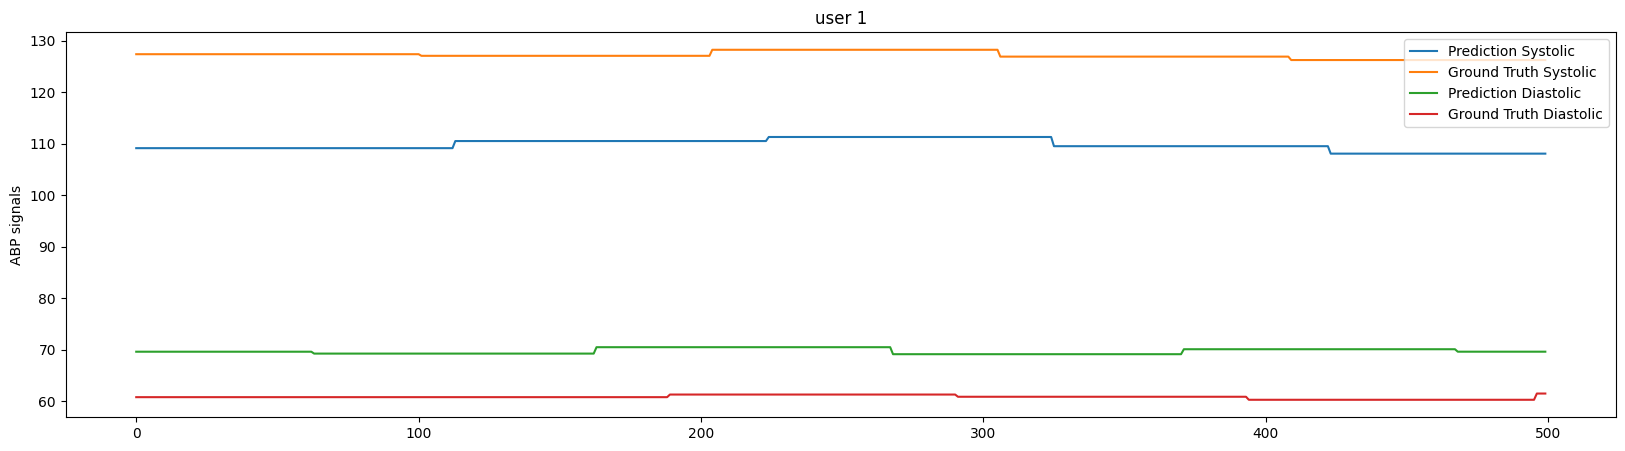

In [67]:
plt.figure(figsize=(20,5))
plt.plot(pred_sys[:500], label='Prediction Systolic')
plt.plot(gt_sys[:500], label='Ground Truth Systolic')
plt.plot(pred_dia[:500], label='Prediction Diastolic')
plt.plot(gt_dia[:500], label='Ground Truth Diastolic')
plt.ylabel('ABP signals')
plt.legend(loc='upper right')
plt.title('user ' + str(user_test+1))
plt.show()

In [68]:
pred_sys_ls = []
gt_sys_ls = []
pred_dia_ls = []
gt_dia_ls = []

rmse_sys_subjects = []
rmse_dia_subjects = []
mae_sys_subjects = []
mae_dia_subjects = []

for i in range(X_test.shape[0]):
    test_x, test_zeros, _ = to_timeseries(X_test[i], y_test[i], is_train=False, max_len=timewindow)
    ground_truth_x, _, ground_truth_y = to_timeseries(X_test[i], y_test[i], is_train=False, max_len=timewindow)
    y_test_predicted = model.predict([np.array(test_x), test_zeros],
                                     batch_size=batch_size)
    p_abp = []
    g_abp = []
    for j in range(y_test_predicted.shape[0]):
        p_abp.append(y_test_predicted[j][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)
        g_abp.append(ground_truth_y[j][-1][0]*(abp_all_max-abp_all_min)+abp_all_min)


    p_sys = zero_order_holding_first(p_abp, delay=100, is_sys=True)
    g_sys = zero_order_holding_first(g_abp, delay=100, is_sys=True)
    p_dia = zero_order_holding_first(p_abp, delay=100, is_sys=False)
    g_dia = zero_order_holding_first(g_abp, delay=100, is_sys=False)


    p_sys = zero_order_second(p_sys)
    g_sys = zero_order_second(g_sys)
    p_dia = zero_order_second(p_dia)
    g_dia = zero_order_second(g_dia)

    pred_sys_ls.extend(p_sys)
    gt_sys_ls.extend(g_sys)
    pred_dia_ls.extend(p_dia)
    gt_dia_ls.extend(g_dia)

    rmse_sys_all = sqrt(mean_squared_error(gt_sys_ls, pred_sys_ls))
    rmse_dia_all = sqrt(mean_squared_error(gt_dia_ls, pred_dia_ls))
    mae_sys_all = mean_absolute_error(gt_sys_ls, pred_sys_ls)
    mae_dia_all = mean_absolute_error(gt_dia_ls, pred_dia_ls)

    rmse_sys_subjects.append(sqrt(mean_squared_error(g_sys, p_sys)))
    rmse_dia_subjects.append(sqrt(mean_squared_error(g_dia, p_dia)))
    mae_sys_subjects.append(mean_absolute_error(g_sys, p_sys))
    mae_dia_subjects.append(mean_absolute_error(g_dia, p_dia))

3/3 [==============================] - 0s 25ms/step


In [70]:
print('Overall RMSE Systolic: %.3f (mmHg)' % rmse_sys_all)
print('Overall RMSE Diastolic: %.3f (mmHg)' % rmse_dia_all)


print('Overall MAE Systolic: %.3f (mmHg)' % mae_sys_all)
print('Overall MAE Diastolic: %.3f (mmHg)' % mae_dia_all)

Overall RMSE Systolic: 23.559 (mmHg)
Overall RMSE Diastolic: 12.122 (mmHg)
Overall MAE Systolic: 18.345 (mmHg)
Overall MAE Diastolic: 9.415 (mmHg)


In [71]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

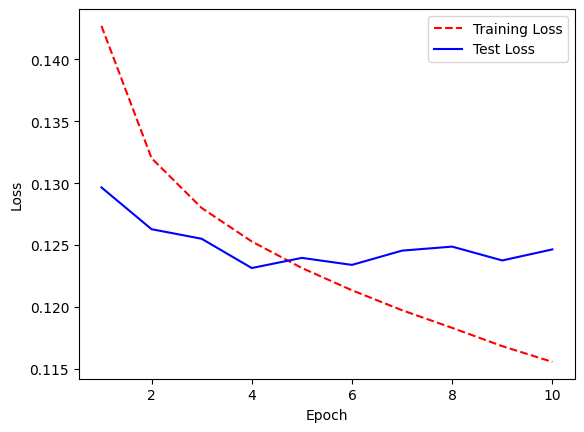

In [72]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();